https://docs.opencv.org/2.4/doc/tutorials/imgproc/imgtrans/warp_affine/warp_affine.html#warp-affine

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt

import os

from torchvision.transforms import ToPILImage
from PIL import Image
from torchvision.utils import make_grid
from torchvision.transforms import ToTensor
from torch import Tensor

from typing import List

In [3]:
from biomedical_image_segmentation.plot_utils import insert_grid
from biomedical_image_segmentation.elastic_deform import AffineTransform, ElasticTransform

In [80]:
def plot_images(imgs: List[np.ndarray]):
    """Generate PIL image from given list of 3-d NumPy arrays."""
    return ToPILImage()(
        make_grid([ToTensor()(img) for img in imgs], pad_value=1, padding=10, nrow=2))

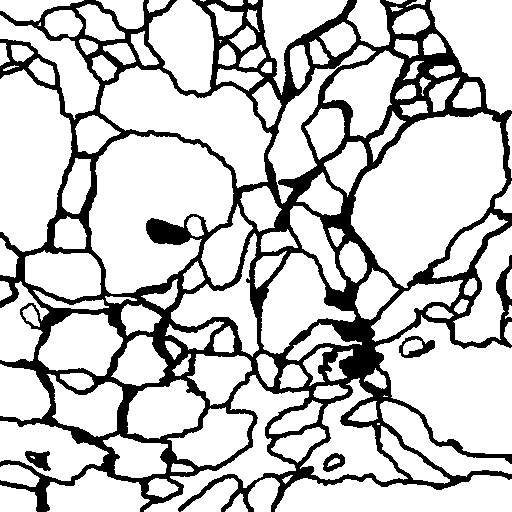

In [5]:
img = Image.open("/home/mittal.nit/projects/biomedical_image_segmentation/data/masks/train/0.tif")
img

In [6]:
img = np.expand_dims(np.array(img), axis=-1)
print(f"Image shape: {img.shape}")

Image shape: (512, 512, 1)


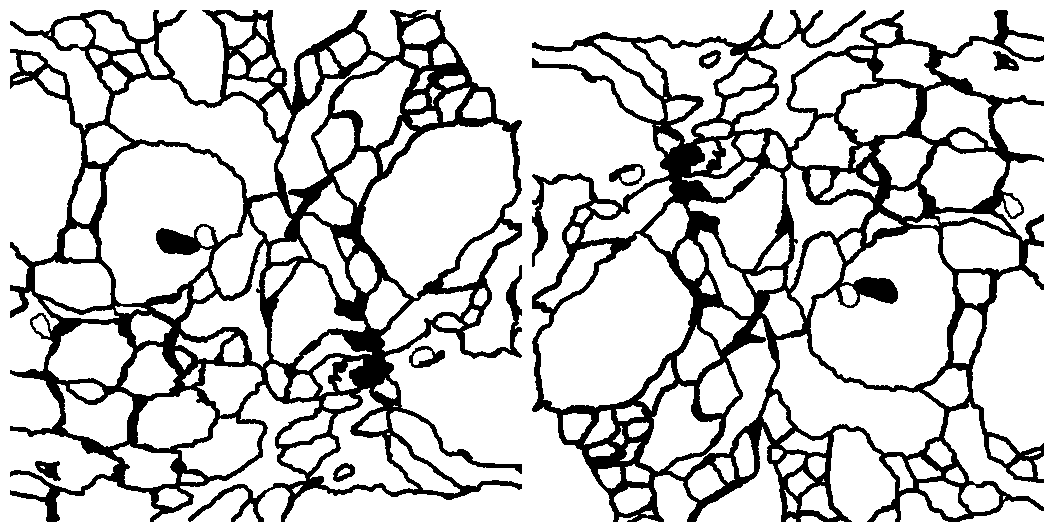

In [7]:
angle = 180.
alpha = 0.
seed = 40
af = AffineTransform(angle=angle, alpha=alpha, seed=40)
af_img = af.transform(img)
plot_images([img, af_img])

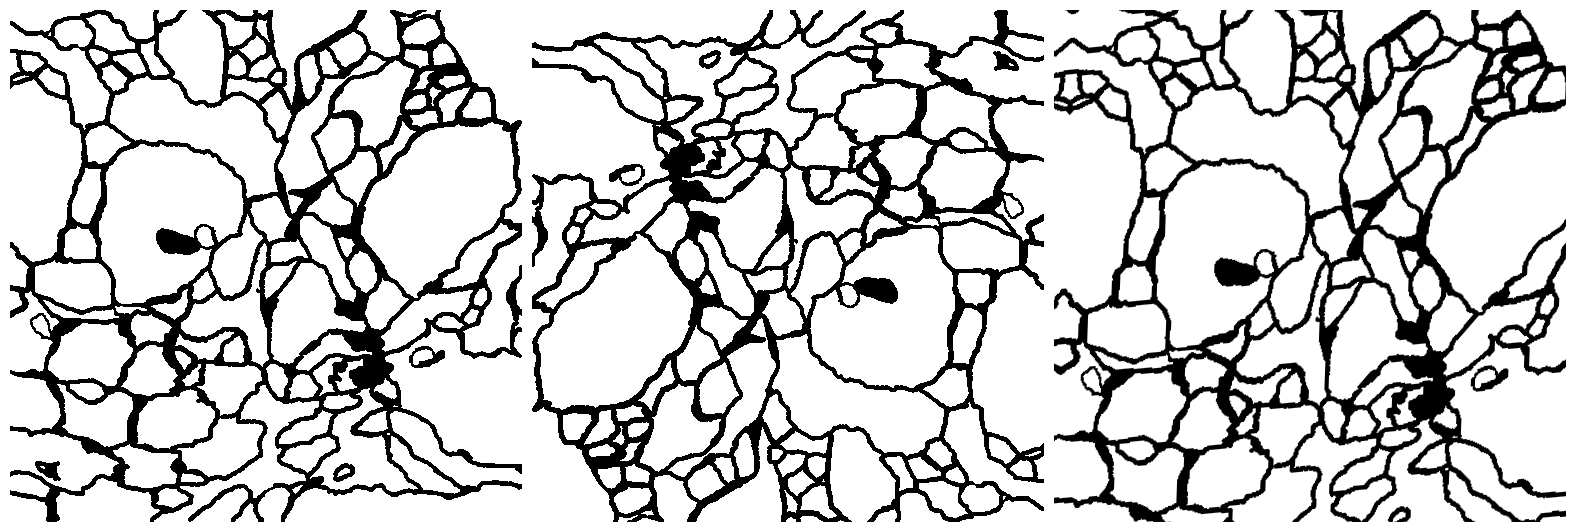

In [8]:
angle = 0.
alpha = 40.
seed = 40
af = AffineTransform(angle=angle, alpha=alpha, seed=40)
af_img2 = af.transform(img)
plot_images([img, af_img, af_img2])

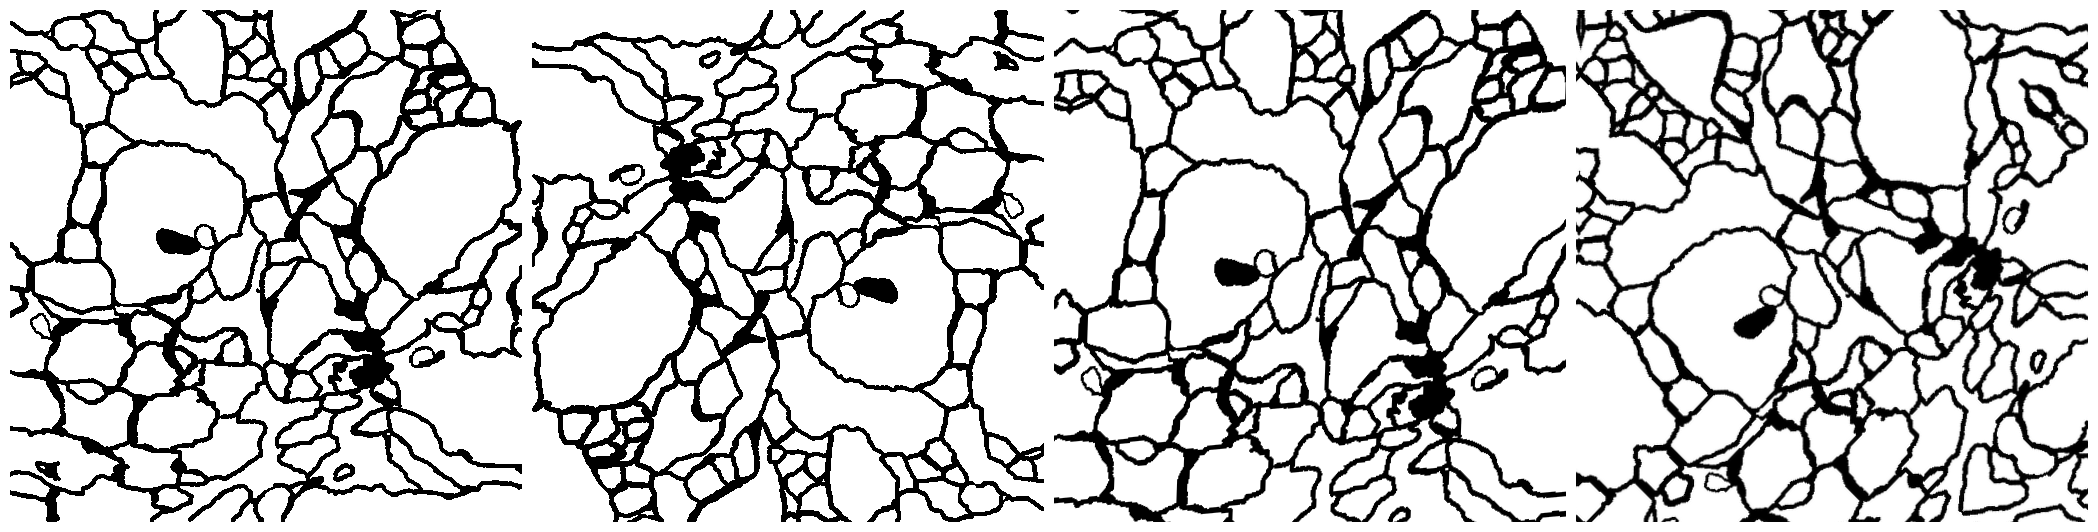

In [9]:
angle = 45.
alpha = 10.
seed = 40
af = AffineTransform(angle=angle, alpha=alpha, seed=40)
af_img3 = af.transform(img)
plot_images([img, af_img, af_img2, af_img3])

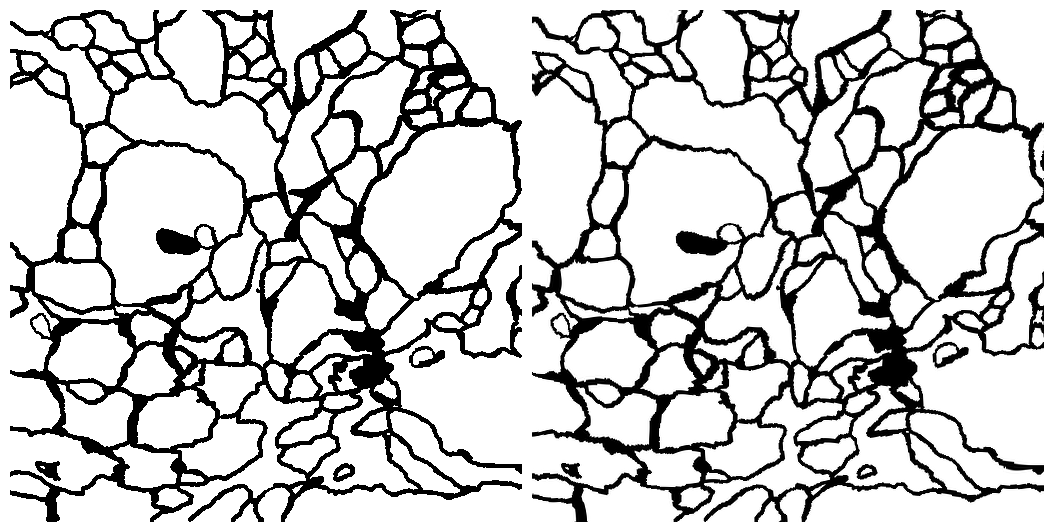

In [11]:
sigma = 12.
alpha = 200.
es = ElasticTransform(sigma=12., alpha=alpha, seed=seed)
es_img = es.transform(img)
plot_images([img, es_img])

In [12]:
es = ElasticTransform(sigma=12., alpha=alpha, seed=seed)
es_img2 = es.transform(img)
np.allclose(es_img, es_img2)

True

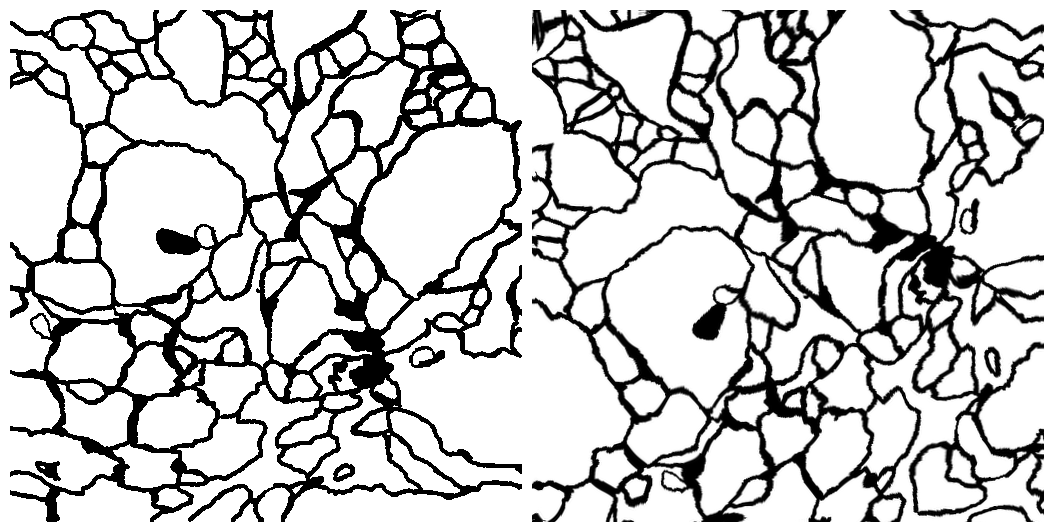

In [27]:
tf_img = af.transform(img)
tf_img = es.transform(tf_img)
plot_images([img, tf_img])

In [31]:
np.unique(tf_img2, return_counts=True)

(array([  0, 255]), array([ 56716, 205428]))

In [36]:
tf_img2.dtype

dtype('int64')

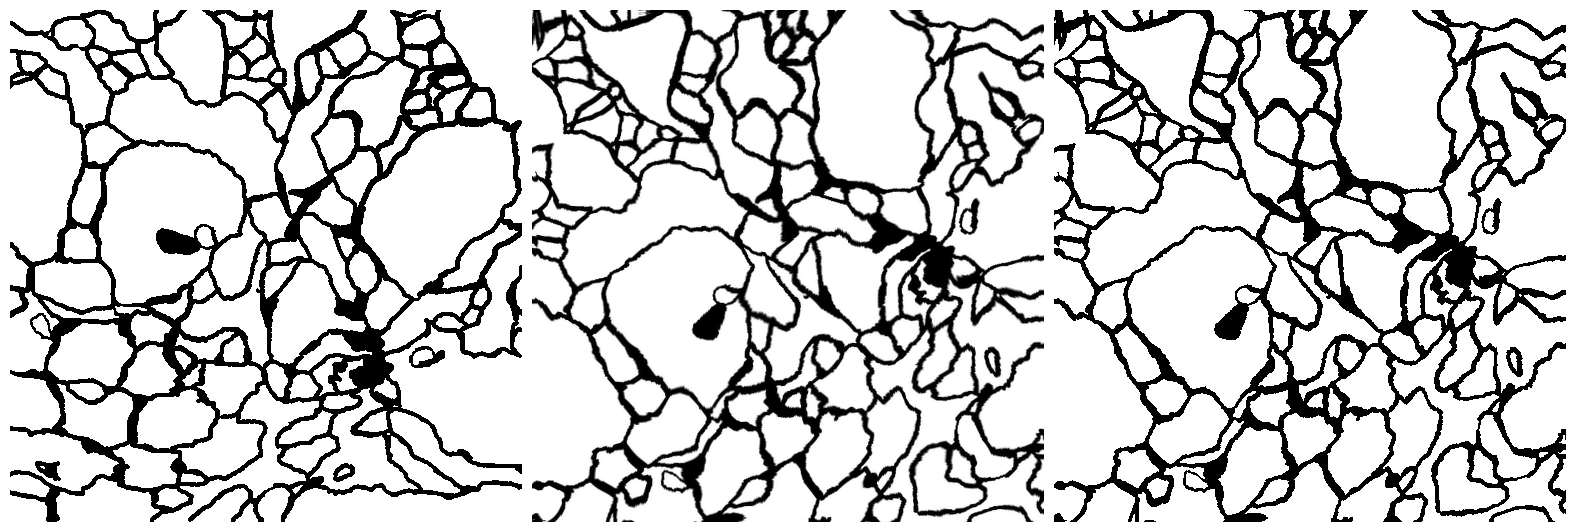

In [41]:
tf_img2 = np.where(tf_img < 255//2, 0, 255).astype(np.uint8)
plot_images([img, tf_img, tf_img2])

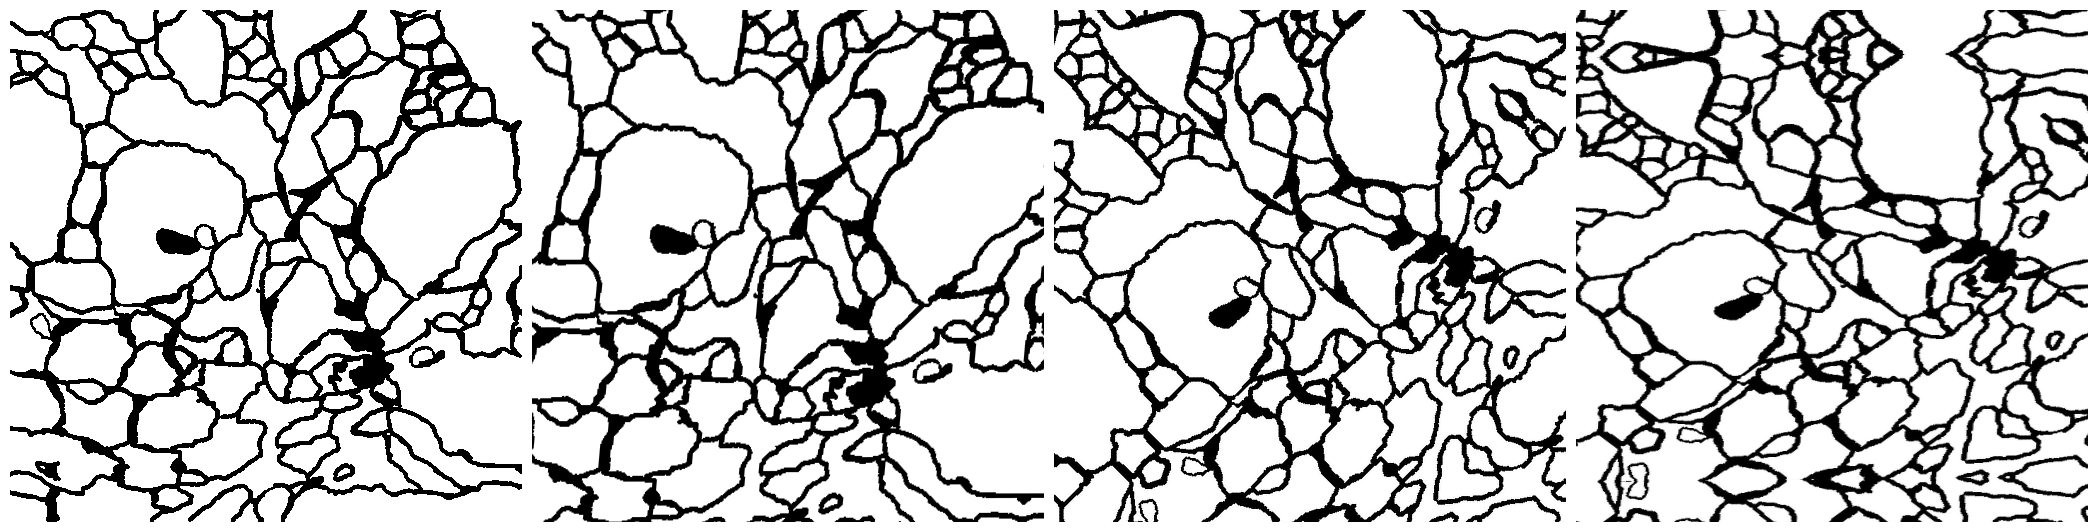

In [15]:
trnsf_img3 = getAffineTransform(img, degree=45, alpha=50)
plot_images([img, trnsf_img1, trnsf_img2, trnsf_img3])

# Elastic deformation

(512, 512) (512, 512)


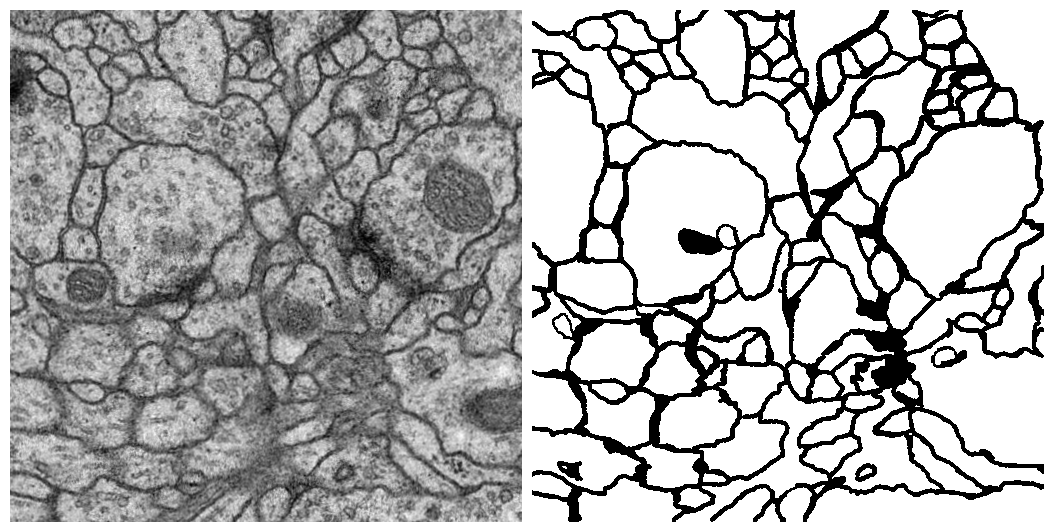

In [66]:
img = Image.open("/home/mittal.nit/projects/biomedical_image_segmentation/data/samples/train/0.tif")
mask = Image.open("/home/mittal.nit/projects/biomedical_image_segmentation/data/masks/train/0.tif")
print(img.size, mask.size)
img = np.expand_dims(img, axis=-1)
mask = np.expand_dims(mask, axis=-1)
plot_images([img, mask])

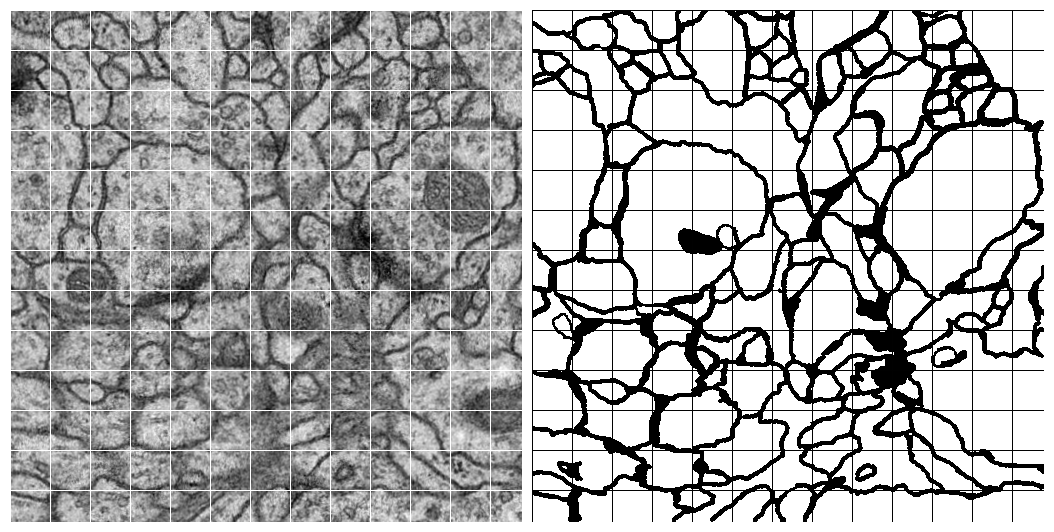

In [73]:
img = insert_grid(img, grid_size=(40, 40), color=(255,255,255))
mask = insert_grid(mask, grid_size=(40, 40), )
plot_images([img, mask])

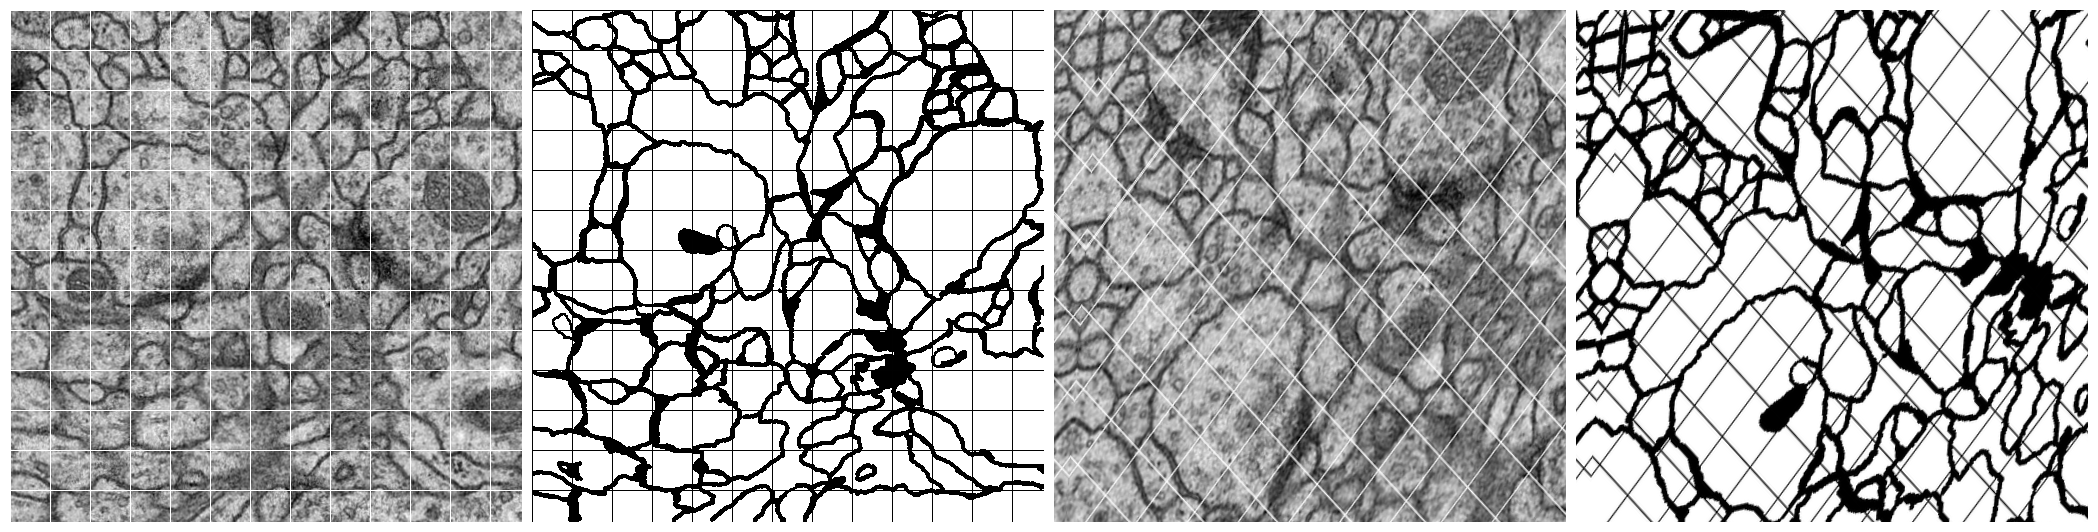

In [74]:
angle = 45.
alpha = 100.
seed = 40
af = AffineTransform(angle=angle, alpha=alpha, seed=40)

af_img = af.transform(img)
af_mask = af.transform(mask)
plot_images([img, mask, af_img, af_mask])

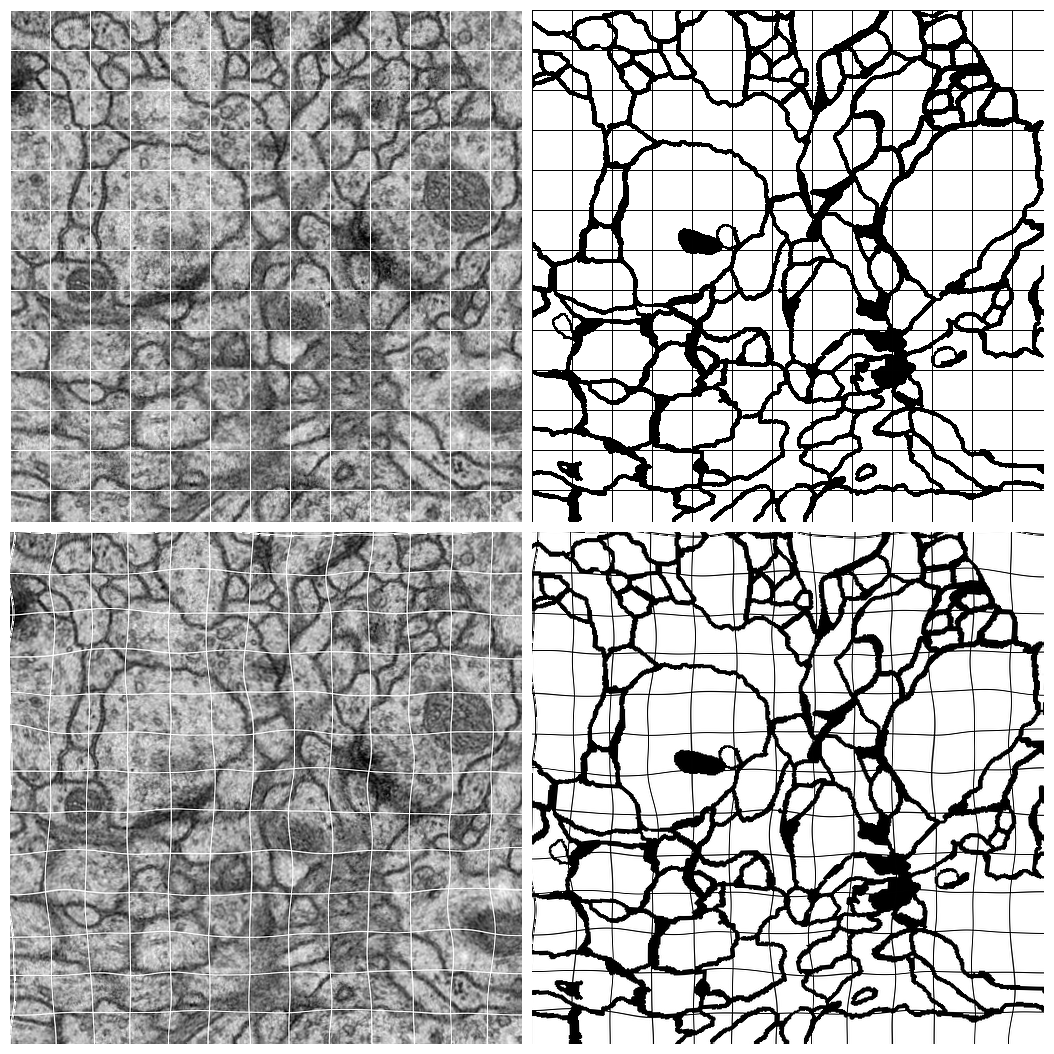

In [81]:
sigma = 20.
alpha = 240.
seed = 40
es = ElasticTransform(sigma=sigma, alpha=alpha, seed=40)

es_img = es.transform(img)
es_mask = es.transform(mask)
plot_images([img, mask, es_img, es_mask])